Ссылка на соревнование: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# House Prices - Advanced Regression Techniques

## Загрузка и подготовка данных

In [2]:
train_data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test.csv")
sample_data = pd.read_csv("../data/sample_submission.csv")

In [3]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


В тестовых данных не хватает целевого признака `SalePrice` - возьмём его из `sample_data` и присоединим его к набору данных `test_data`, он понадобится нам для оценки качества модели

In [5]:
test_data = pd.merge(test_data, sample_data, how = 'inner')
test_data.shape

(1459, 81)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

В наборе данных есть признаки с большим числом нулевых объектов. Мы не будем учитывать их при прогнозировании, поэтому избавимся от них
Так же избавимся от признака `Id`, так как он не несёт никакой информации

In [7]:
def drop_nans(data):
  manynans = ["Alley", "PoolQC", "Fence", "MiscFeature"]
  res = data.copy()
  res = res.drop(manynans, axis=1)
  res = res.drop('Id', axis=1)
  return res

Разделим наши данные на числовые и категориальные признаки

In [8]:
def columns_split(data):
  num_cols = []
  cat_cols = []

  for column in data.columns:
      if data[column].dtypes == 'object':
          cat_cols.append(column)
      else:
          num_cols.append(column)

  print(num_cols)
  print(cat_cols)

  print('Columns count in data: {}'.format(len(data.columns)))
  print('Columns count in num_cols: {}'.format(len(num_cols)))
  print('Columns count in cat_cols: {}'.format(len(cat_cols)))
  #print('Columns count in num_cols + columns count in cat_cols: {}'.format(len(num_cols) + len(cat_cols)))
  
  return num_cols, cat_cols

Мы уже описывали метод для удаления из датасета признаков с большим числом пропусков. Однако в датасете всё ещё есть признаки с пропусками

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Заполним пропуски в признаках средними значениями

In [10]:
def replace_na(data):
  res = data.copy()
  res = res.fillna(res.mean())
  return res

Кодируем наши категориальные признаки

In [11]:
def encoding(data, cat):
  res = data.copy()
  ## Какое значение признака какой цифре соответствует
  #for column in cat:
  #    print("{}:{}".format(res[column].unique(), res[column].astype('category').cat.codes.unique()))

  for column in cat:
      res[column] = res[column].astype('category').cat.codes
  
  return res

Нормируем числовые признаки в нашем датасете по формуле с помощью `RobustScaler`

In [12]:
from sklearn.preprocessing import RobustScaler
import numpy as np

def norm(data, num):
  res = data[num].copy()
  target = pd.DataFrame(res.SalePrice)
  
  scaler = RobustScaler()
  fit_results = scaler.fit_transform(res)
  
  res = pd.DataFrame(fit_results, columns = res.columns)
  res = res.drop('SalePrice', axis=1)
  res = pd.merge(res, target, how='inner', on=res.index)
  res = res.drop('key_0', axis=1)

  target_scaled = np.log1p(res.SalePrice)
  
  res.SalePrice = target_scaled
  
  return res

Разобьём данные на входные и выходные, и проведём их подготовку

In [13]:
train_data = drop_nans(train_data)
num_cols, cat_cols = columns_split(train_data)
train_data = encoding(train_data, cat_cols)
train_data[num_cols] = norm(train_data, num_cols)
train_data = replace_na(train_data)

display(train_data)

X_train = train_data.drop('SalePrice', axis=1)
y_train = train_data.SalePrice

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'Garag

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.2,3,-0.190476,-0.254076,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,8,4,12.247699
1,-0.6,3,0.523810,0.030015,1,3,3,0,2,0,...,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5,8,4,12.109016
2,0.2,3,-0.047619,0.437624,1,0,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,8,4,12.317171
3,0.4,3,-0.428571,0.017663,1,0,3,0,0,0,...,272.0,0.0,0.0,0.0,0.0,-1.333333,-1.0,8,0,11.849405
4,0.2,3,0.714286,1.181201,1,0,3,0,2,0,...,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,8,4,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.2,3,-0.333333,-0.385746,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,0.666667,-0.5,8,4,12.072547
1456,-0.6,3,0.761905,0.913167,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,-1.333333,1.0,8,4,12.254868
1457,0.4,3,-0.142857,-0.107831,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,2500.0,-0.333333,1.0,8,4,12.493133
1458,-0.6,3,-0.047619,0.058918,1,3,3,0,4,0,...,112.0,0.0,0.0,0.0,0.0,-0.666667,1.0,8,4,11.864469


In [14]:
test_data = drop_nans(test_data)
num_cols, cat_cols = columns_split(test_data)
test_data = encoding(test_data, cat_cols)
test_data[num_cols] = norm(test_data, num_cols)
test_data = replace_na(test_data)

display(test_data)

X_test = test_data.drop('SalePrice', axis=1)
y_test = test_data.SalePrice

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'Garag

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-0.6,2,0.590909,0.538713,1,3,3,0,4,0,...,0.0,0.0,120.0,0.0,0.0,0.00,1.0,8,4,12.039298
1,-0.6,3,0.636364,1.179692,1,0,3,0,0,0,...,0.0,0.0,0.0,0.0,12500.0,0.00,1.0,8,4,12.142917
2,0.2,3,0.318182,1.073791,1,0,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,-0.75,1.0,8,4,12.120431
3,0.2,3,0.500000,0.140313,1,0,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,0.00,1.0,8,4,12.096919
4,1.4,3,-1.090909,-1.064825,1,0,1,0,4,0,...,0.0,0.0,144.0,0.0,0.0,-1.25,1.0,8,4,11.923253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.2,4,-2.090909,-1.808554,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,0.00,-1.0,8,4,12.026241
1455,2.2,4,-2.090909,-1.818733,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,-0.50,-1.0,8,0,12.012426
1456,-0.6,3,4.227273,2.569005,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,0.75,-1.0,8,0,12.297847
1457,0.7,3,-0.227273,0.252514,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,700.0,0.25,-1.0,8,4,12.127707


Посмотрим, как наши числовые признаки коррелируют друг с другом

<AxesSubplot:>

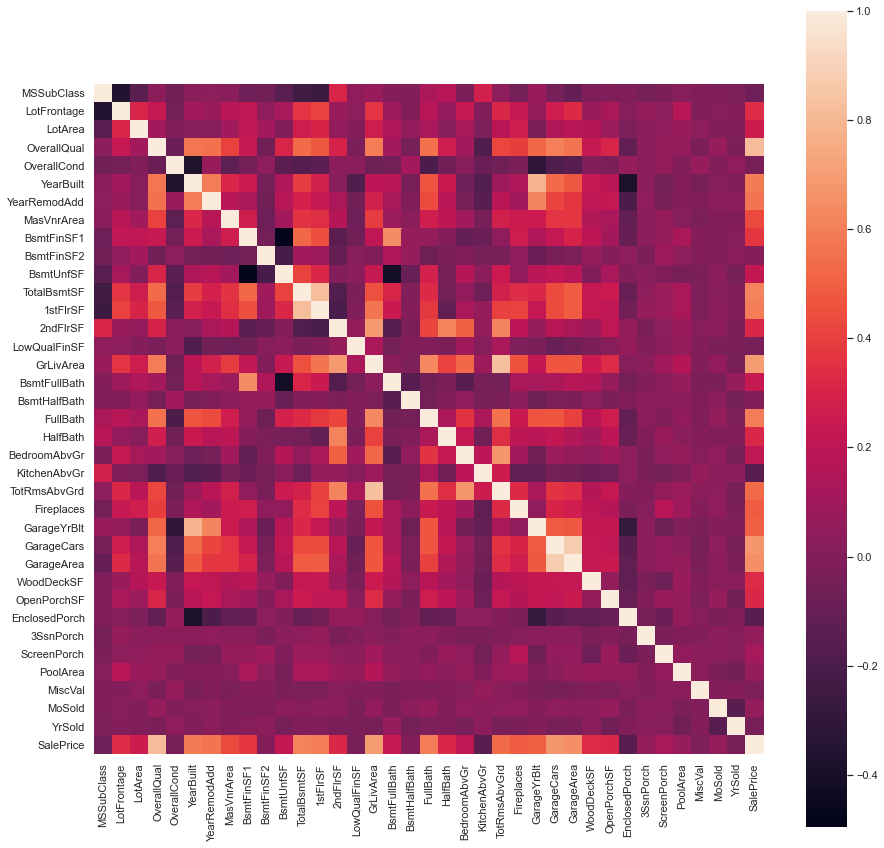

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(data=train_data[num_cols].corr(), square=True)

In [16]:
arr = train_data[num_cols].corr().values
arr.sort()
for elem in arr:
  print(elem[::-1].tolist())

0660946, 0.36335772276980877, 0.3624520940543847, 0.3395193238986557, 0.3237224136066496, 0.3116999189772759, 0.30735055373550335, 0.29106558260416593, 0.2855725637257947, 0.2608331345451578, 0.2472637462881082, 0.2320186091290181, 0.12605313210083754, 0.10480953760636791, 0.08448898591431157, 0.050449955512678155, 0.03738372726300494, 0.013196178616778544, -0.0003145818198337802, -0.014968648018750946, -0.01847892243147204, -0.03324538734745638, -0.04880373863521241, -0.06890064264201662, -0.09547773670640768, -0.171097514624922, -0.17451195013496076, -0.238518409315119]
[1.0, 0.819529975005034, 0.5969813231855344, 0.566023968935749, 0.4897816541041926, 0.4762238290781767, 0.4458626560920056, 0.4393168079906708, 0.4142663943688997, 0.4105310846598465, 0.4095159788668321, 0.3806374949735076, 0.3421603376753383, 0.31798743835272625, 0.2994745785077634, 0.281985858699801, 0.2446711042477108, 0.2403792676035553, 0.23545862278369842, 0.22712703579858162, 0.21167122549798476, 0.131524975640

## Построение модели

Построим несколько обычных моделей

Основной мерой оценки будет являться коэффициент детерминации $R^2$ - чем он выше, тем лучше отрабатывает модель

`MSE, MAE, RMSE` оценивают ошибку на тренировочной выборке

### Линейная регрессия

In [17]:
import sklearn.linear_model

In [18]:
clf_linreg = sklearn.linear_model.LinearRegression()

clf_linreg.fit(X_train, y_train)

pred_linreg = clf_linreg.predict(X_test)

In [19]:
print(len(pred_linreg.tolist()))
print(pred_linreg.tolist())

843495387105369, 12.24545763871821, 12.5522246366061, 11.904422177039825, 11.341227214505832, 12.559475263886615, 11.00410195080546, 12.443328756776177, 11.921151128173479, 12.125931624237092, 11.93611886804273, 12.819379740528742, 12.672082100778281, 12.432098306874769, 12.306019480195786, 12.24528131672407, 12.823508656650148, 11.835300284081558, 12.038775725463573, 11.7086966416513, 11.817198080473208, 11.882158421935326, 11.864513089352384, 12.119141271577668, 12.143811186411861, 12.093850173356763, 12.149419357882065, 12.141305372969116, 12.094412494913529, 12.368940651882687, 12.159207175138235, 12.105349776420056, 12.176160511803811, 12.273039072707483, 12.760790280560114, 12.801958685496228, 12.031045855487935, 12.464941656245575, 12.088424484450238, 12.459059428710242, 12.210977160150874, 12.47704716152784, 12.311715367130159, 12.135557790344269, 12.153077698341466, 11.805928225321786, 12.849057481555327, 11.96129786441954, 12.70036177728522, 11.900780916821072, 11.61998587094

In [20]:
print(len(y_test.tolist()))
print(y_test.tolist())

9510138, 12.128912839509793, 12.187478496867762, 12.258681202560211, 12.021382002902774, 11.950317824916377, 12.06437373383794, 12.097376369930071, 12.009338382244119, 12.050870935537892, 12.025027796492596, 12.144890935783724, 12.120069907131265, 12.075525520835098, 12.155100906444238, 12.067849261405206, 12.049772712483962, 12.11726977442364, 12.120529176386018, 12.004814888362114, 12.0117514383942, 11.99779353071196, 12.112907640948578, 12.166421526675226, 12.080468772012761, 12.111290311558136, 12.0959067016538, 12.188909031014939, 12.17984861007633, 11.907381322669938, 11.985354926154393, 12.10778428850024, 12.167725803516861, 11.968455529411651, 12.282044961061578, 12.110801620452655, 12.309594514580281, 12.015410155248292, 12.451488284161119, 12.061945839179057, 12.122069389416104, 12.207128855586344, 12.136723753168214, 12.168991212504295, 12.093070036390037, 12.104324167593878, 12.235651389064458, 12.022502380115201, 12.220553399755072, 12.167669442036866, 12.05394947585546, 1

Выведем оценки

In [21]:
from sklearn import metrics

In [22]:
print("R^2:", clf_linreg.score(X_train, y_train))
print("MSE:", metrics.mean_squared_error(y_test, pred_linreg, squared=True))
print("MAE:", metrics.mean_absolute_error(y_test, pred_linreg))
print("RMSE:", metrics.mean_squared_error(y_test, pred_linreg, squared=False))

R^2: 0.886536996960223
MSE: 0.13541503788780304
MAE: 0.2990419060814315
RMSE: 0.36798782301565774


### Случайный лес

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
clf_rf = RandomForestRegressor(random_state=13)

clf_rf.fit(X_train, y_train)

pred_rf = clf_rf.predict(X_test)

In [25]:
print(len(pred_rf.tolist()))
print(pred_rf.tolist())

12563540072363, 12.463184186057164, 11.913642033966488, 10.987469080209362, 12.688139739535423, 11.020209073972742, 12.461686422730141, 11.821068241599301, 12.006431837391787, 11.947166880414157, 12.930351419611773, 12.678169470401752, 12.200427265897156, 12.398719930573773, 12.36810408072333, 12.858556527876038, 11.86418591033354, 12.031328278577844, 11.750729051587738, 11.75723021472359, 11.835822734424449, 11.848020250274068, 12.058763086634524, 12.10616675367694, 12.086396902554092, 12.153582453110847, 12.12159599293102, 12.045539095607156, 12.461658643514722, 12.198313383349857, 12.102440433707997, 12.17822246844171, 12.205428762925568, 12.65029924262791, 12.798957700614917, 11.945253009632667, 12.635774950830232, 12.010970735379637, 12.460404668899317, 12.14277904590464, 12.47793595885619, 12.401756847270365, 12.013673224438527, 12.233307714243455, 11.830647408917281, 12.542665967997296, 12.030312146108626, 12.701079078346345, 11.904727056049287, 11.650498756268277, 11.6763848885

In [26]:
print(len(y_test.tolist()))
print(y_test.tolist())

9510138, 12.128912839509793, 12.187478496867762, 12.258681202560211, 12.021382002902774, 11.950317824916377, 12.06437373383794, 12.097376369930071, 12.009338382244119, 12.050870935537892, 12.025027796492596, 12.144890935783724, 12.120069907131265, 12.075525520835098, 12.155100906444238, 12.067849261405206, 12.049772712483962, 12.11726977442364, 12.120529176386018, 12.004814888362114, 12.0117514383942, 11.99779353071196, 12.112907640948578, 12.166421526675226, 12.080468772012761, 12.111290311558136, 12.0959067016538, 12.188909031014939, 12.17984861007633, 11.907381322669938, 11.985354926154393, 12.10778428850024, 12.167725803516861, 11.968455529411651, 12.282044961061578, 12.110801620452655, 12.309594514580281, 12.015410155248292, 12.451488284161119, 12.061945839179057, 12.122069389416104, 12.207128855586344, 12.136723753168214, 12.168991212504295, 12.093070036390037, 12.104324167593878, 12.235651389064458, 12.022502380115201, 12.220553399755072, 12.167669442036866, 12.05394947585546, 1

In [27]:
print("R^2:", clf_rf.score(X_train, y_train))
print("MSE:", metrics.mean_squared_error(y_test, pred_rf, squared=True))
print("MAE:", metrics.mean_absolute_error(y_test, pred_rf))
print("RMSE:", metrics.mean_squared_error(y_test, pred_rf, squared=False))

R^2: 0.9831341934109078
MSE: 0.1300287671537617
MAE: 0.2960779966647673
RMSE: 0.3605950182043031


### Lasso

In [28]:
clf_lasso = sklearn.linear_model.Lasso()

clf_lasso.fit(X_train, y_train)

pred_lasso = clf_lasso.predict(X_test)

In [29]:
print(len(pred_lasso.tolist()))
print(pred_lasso.tolist())

73190522, 12.031753673190522, 12.089998412400911, 12.031753673190522, 12.031753673190522, 12.031753673190522, 12.000460658688983, 12.031753673190522, 12.031753673190522, 12.031753673190522, 12.031753673190522, 12.031753673190522, 12.031753673190522, 12.022991629130091, 12.031753673190522, 12.031753673190522, 11.784740073549406, 12.031753673190522, 12.031753673190522, 12.031753673190522, 12.031753673190522, 12.031753673190522, 12.031753673190522, 12.101647360242989, 12.031753673190522, 12.031753673190522, 11.928383851601577, 12.031753673190522, 12.031753673190522, 11.92570827332832, 12.031753673190522, 11.910931803800846, 12.100191241762728, 12.031753673190522, 12.031753673190522, 12.031753673190522, 12.031753673190522, 12.031753673190522, 12.031753673190522, 12.132711221155196, 12.031753673190522, 11.88542496470747, 12.031753673190522, 12.031753673190522, 12.031753673190522, 12.031753673190522, 12.031753673190522, 12.031753673190522, 12.031753673190522, 12.031753673190522, 12.031753673

In [30]:
print(len(y_test.tolist()))
print(y_test.tolist())

9510138, 12.128912839509793, 12.187478496867762, 12.258681202560211, 12.021382002902774, 11.950317824916377, 12.06437373383794, 12.097376369930071, 12.009338382244119, 12.050870935537892, 12.025027796492596, 12.144890935783724, 12.120069907131265, 12.075525520835098, 12.155100906444238, 12.067849261405206, 12.049772712483962, 12.11726977442364, 12.120529176386018, 12.004814888362114, 12.0117514383942, 11.99779353071196, 12.112907640948578, 12.166421526675226, 12.080468772012761, 12.111290311558136, 12.0959067016538, 12.188909031014939, 12.17984861007633, 11.907381322669938, 11.985354926154393, 12.10778428850024, 12.167725803516861, 11.968455529411651, 12.282044961061578, 12.110801620452655, 12.309594514580281, 12.015410155248292, 12.451488284161119, 12.061945839179057, 12.122069389416104, 12.207128855586344, 12.136723753168214, 12.168991212504295, 12.093070036390037, 12.104324167593878, 12.235651389064458, 12.022502380115201, 12.220553399755072, 12.167669442036866, 12.05394947585546, 1

In [31]:
print("R^2:", clf_lasso.score(X_train, y_train))
print("MSE:", metrics.mean_squared_error(y_test, pred_lasso, squared=True))
print("MAE:", metrics.mean_absolute_error(y_test, pred_lasso))
print("RMSE:", metrics.mean_squared_error(y_test, pred_lasso, squared=False))

R^2: 0.032484640304506374
MSE: 0.016439624558791797
MAE: 0.09873052331319214
RMSE: 0.12821709932295222


### Ridge (Гребневая регрессия)

In [32]:
clf_ridge = sklearn.linear_model.Ridge()

clf_ridge.fit(X_train, y_train)

pred_ridge = clf_ridge.predict(X_test)

In [33]:
print(len(pred_ridge.tolist()))
print(pred_ridge.tolist())

 11.9437147306865, 11.843065767567452, 12.242586040768108, 12.550076838526282, 11.905352188511195, 11.339842104645452, 12.556399126153735, 10.936670992695072, 12.442309256423961, 11.920502548044613, 12.123164671598467, 11.93329212039898, 12.81742015318639, 12.668858851006103, 12.430496029528543, 12.30418562697735, 12.243138352821221, 12.821820945531428, 11.83465874154154, 12.037260015470121, 11.707277810145465, 11.81331016786195, 11.880724207184876, 11.864570401934087, 12.116829296063587, 12.14415117539264, 12.094210244699592, 12.149625665000379, 12.141207995211193, 12.093822350885873, 12.369626763699882, 12.156564701457295, 12.105014206998364, 12.175498470131565, 12.270350171157405, 12.76026660678475, 12.80011299559941, 11.932152237617618, 12.464103707490509, 12.086869037982813, 12.457572929702348, 12.20933127074087, 12.475378777291832, 12.309828222246166, 12.134792887838985, 12.152110551730336, 11.80537347747904, 12.846068300321493, 11.960082062192889, 12.698685073873062, 11.90132540

In [34]:
print(len(y_test.tolist()))
print(y_test.tolist())

9510138, 12.128912839509793, 12.187478496867762, 12.258681202560211, 12.021382002902774, 11.950317824916377, 12.06437373383794, 12.097376369930071, 12.009338382244119, 12.050870935537892, 12.025027796492596, 12.144890935783724, 12.120069907131265, 12.075525520835098, 12.155100906444238, 12.067849261405206, 12.049772712483962, 12.11726977442364, 12.120529176386018, 12.004814888362114, 12.0117514383942, 11.99779353071196, 12.112907640948578, 12.166421526675226, 12.080468772012761, 12.111290311558136, 12.0959067016538, 12.188909031014939, 12.17984861007633, 11.907381322669938, 11.985354926154393, 12.10778428850024, 12.167725803516861, 11.968455529411651, 12.282044961061578, 12.110801620452655, 12.309594514580281, 12.015410155248292, 12.451488284161119, 12.061945839179057, 12.122069389416104, 12.207128855586344, 12.136723753168214, 12.168991212504295, 12.093070036390037, 12.104324167593878, 12.235651389064458, 12.022502380115201, 12.220553399755072, 12.167669442036866, 12.05394947585546, 1

In [35]:
print("R^2:", clf_ridge.score(X_train, y_train))
print("MSE:", metrics.mean_squared_error(y_test, pred_ridge, squared=True))
print("MAE:", metrics.mean_absolute_error(y_test, pred_ridge))
print("RMSE:", metrics.mean_squared_error(y_test, pred_ridge, squared=False))

R^2: 0.8864783547591185
MSE: 0.13544420123685816
MAE: 0.2991497382990456
RMSE: 0.36802744630918244


### ElasticNet

In [36]:
clf_elnet = sklearn.linear_model.ElasticNet()

clf_elnet.fit(X_train, y_train)

pred_elnet = clf_elnet.predict(X_test)

In [37]:
print(len(pred_elnet.tolist()))
print(pred_elnet.tolist())

1629817613258, 12.031629817613258, 12.106990901420383, 12.031629817613258, 12.031629817613258, 12.031629817613258, 11.992702518586967, 12.031629817613258, 12.031629817613258, 12.031629817613258, 12.031629817613258, 12.031629817613258, 12.031629817613258, 12.020730173885896, 12.031629817613258, 12.031629817613258, 11.737714652670537, 12.031629817613258, 12.031629817613258, 12.031629817613258, 12.031629817613258, 12.031629817613258, 12.031629817613258, 12.12206311818181, 12.031629817613258, 12.031629817613258, 11.908632710544836, 12.031629817613258, 12.031629817613258, 11.904941345971263, 12.031629817613258, 11.887866965195622, 12.12017909108663, 12.031629817613258, 12.031629817613258, 12.031629817613258, 12.05691765213652, 12.031629817613258, 12.031629817613258, 12.162255696212277, 12.031629817613258, 11.857517029685233, 12.031629817613258, 12.031629817613258, 12.031629817613258, 12.031629817613258, 12.031629817613258, 12.031629817613258, 12.031629817613258, 12.031629817613258, 12.03162

In [38]:
print(len(y_test.tolist()))
print(y_test.tolist())

9510138, 12.128912839509793, 12.187478496867762, 12.258681202560211, 12.021382002902774, 11.950317824916377, 12.06437373383794, 12.097376369930071, 12.009338382244119, 12.050870935537892, 12.025027796492596, 12.144890935783724, 12.120069907131265, 12.075525520835098, 12.155100906444238, 12.067849261405206, 12.049772712483962, 12.11726977442364, 12.120529176386018, 12.004814888362114, 12.0117514383942, 11.99779353071196, 12.112907640948578, 12.166421526675226, 12.080468772012761, 12.111290311558136, 12.0959067016538, 12.188909031014939, 12.17984861007633, 11.907381322669938, 11.985354926154393, 12.10778428850024, 12.167725803516861, 11.968455529411651, 12.282044961061578, 12.110801620452655, 12.309594514580281, 12.015410155248292, 12.451488284161119, 12.061945839179057, 12.122069389416104, 12.207128855586344, 12.136723753168214, 12.168991212504295, 12.093070036390037, 12.104324167593878, 12.235651389064458, 12.022502380115201, 12.220553399755072, 12.167669442036866, 12.05394947585546, 1

In [39]:
print("R^2:", clf_elnet.score(X_train, y_train))
print("MSE:", metrics.mean_squared_error(y_test, pred_elnet, squared=True))
print("MAE:", metrics.mean_absolute_error(y_test, pred_elnet))
print("RMSE:", metrics.mean_squared_error(y_test, pred_elnet, squared=False))

R^2: 0.039655191223487485
MSE: 0.0180641549472393
MAE: 0.10261927725361522
RMSE: 0.13440295736046623


### GradientBoostingRegressor

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
clf_gbr = GradientBoostingRegressor()

clf_gbr.fit(X_train, y_train)

pred_gbr = clf_gbr.predict(X_test)

In [42]:
print(len(pred_gbr.tolist()))
print(pred_gbr.tolist())

5249, 12.64719050041284, 11.868283501446612, 10.867441398433261, 12.584497648675015, 10.825884340063672, 12.528920315548485, 11.830698050169003, 11.995238036003386, 11.914460423553535, 13.053375336685246, 12.733482624419285, 12.261188796242148, 12.36665928474113, 12.252410436981577, 12.912054025410491, 11.8322841281858, 12.052185218288551, 11.76727272859554, 11.742621823504379, 11.866338591521561, 11.861233564392796, 12.070813906171026, 12.13524817272116, 12.092991840175815, 12.162545465967385, 12.139111980765572, 12.06859803411145, 12.422678425590611, 12.211232716683456, 12.05589370107092, 12.153432711136288, 12.21840125107248, 12.774336989682599, 12.842119432474348, 11.932747454032222, 12.609587797730645, 12.143943551551233, 12.431563420578314, 12.121240174942766, 12.486174093397638, 12.33997840032279, 12.032150363907851, 12.216153331958543, 11.806389198236776, 12.601496526893063, 11.975687580421383, 12.724477478367131, 11.877862143892882, 11.681672541441488, 11.699448521610533, 11.5

In [43]:
print(len(y_test.tolist()))
print(y_test.tolist())

9510138, 12.128912839509793, 12.187478496867762, 12.258681202560211, 12.021382002902774, 11.950317824916377, 12.06437373383794, 12.097376369930071, 12.009338382244119, 12.050870935537892, 12.025027796492596, 12.144890935783724, 12.120069907131265, 12.075525520835098, 12.155100906444238, 12.067849261405206, 12.049772712483962, 12.11726977442364, 12.120529176386018, 12.004814888362114, 12.0117514383942, 11.99779353071196, 12.112907640948578, 12.166421526675226, 12.080468772012761, 12.111290311558136, 12.0959067016538, 12.188909031014939, 12.17984861007633, 11.907381322669938, 11.985354926154393, 12.10778428850024, 12.167725803516861, 11.968455529411651, 12.282044961061578, 12.110801620452655, 12.309594514580281, 12.015410155248292, 12.451488284161119, 12.061945839179057, 12.122069389416104, 12.207128855586344, 12.136723753168214, 12.168991212504295, 12.093070036390037, 12.104324167593878, 12.235651389064458, 12.022502380115201, 12.220553399755072, 12.167669442036866, 12.05394947585546, 1

In [44]:
print("R^2:", clf_gbr.score(X_train, y_train))
print("MSE:", metrics.mean_squared_error(y_test, pred_gbr, squared=True))
print("MAE:", metrics.mean_absolute_error(y_test, pred_gbr))
print("RMSE:", metrics.mean_squared_error(y_test, pred_gbr, squared=False))

R^2: 0.9569301364426394
MSE: 0.14414996876121874
MAE: 0.30613730120072485
RMSE: 0.3796708689921031


### XGBoost

In [45]:
import xgboost

In [46]:
clf_xgbr = xgboost.XGBRegressor()

clf_xgbr.fit(X_train, y_train)

pred_xgbr = clf_xgbr.predict(X_test)

D:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [47]:
print(len(pred_xgbr.tolist()))
print(pred_xgbr.tolist())

1.686995506286621, 12.356688499450684, 12.45703411102295, 11.755796432495117, 10.850905418395996, 12.653682708740234, 10.87199878692627, 12.55379867553711, 11.881936073303223, 11.988471031188965, 11.88928508758545, 12.895902633666992, 12.657979011535645, 12.349401473999023, 12.165760040283203, 12.325237274169922, 12.972121238708496, 11.847306251525879, 11.990715980529785, 11.791168212890625, 11.852030754089355, 11.909799575805664, 11.915544509887695, 12.14130973815918, 12.125861167907715, 12.062674522399902, 12.142885208129883, 12.146162033081055, 11.950333595275879, 12.524232864379883, 12.13034725189209, 12.096685409545898, 12.1439847946167, 12.134495735168457, 12.861063003540039, 12.861493110656738, 11.795326232910156, 12.668664932250977, 12.013349533081055, 12.267688751220703, 12.103370666503906, 12.438632011413574, 12.39123821258545, 12.023600578308105, 12.232894897460938, 11.90248966217041, 12.574092864990234, 11.893168449401855, 12.684494018554688, 11.847867965698242, 11.69003486

In [48]:
print(len(y_test.tolist()))
print(y_test.tolist())

9510138, 12.128912839509793, 12.187478496867762, 12.258681202560211, 12.021382002902774, 11.950317824916377, 12.06437373383794, 12.097376369930071, 12.009338382244119, 12.050870935537892, 12.025027796492596, 12.144890935783724, 12.120069907131265, 12.075525520835098, 12.155100906444238, 12.067849261405206, 12.049772712483962, 12.11726977442364, 12.120529176386018, 12.004814888362114, 12.0117514383942, 11.99779353071196, 12.112907640948578, 12.166421526675226, 12.080468772012761, 12.111290311558136, 12.0959067016538, 12.188909031014939, 12.17984861007633, 11.907381322669938, 11.985354926154393, 12.10778428850024, 12.167725803516861, 11.968455529411651, 12.282044961061578, 12.110801620452655, 12.309594514580281, 12.015410155248292, 12.451488284161119, 12.061945839179057, 12.122069389416104, 12.207128855586344, 12.136723753168214, 12.168991212504295, 12.093070036390037, 12.104324167593878, 12.235651389064458, 12.022502380115201, 12.220553399755072, 12.167669442036866, 12.05394947585546, 1

In [49]:
print("R^2:", clf_xgbr.score(X_train, y_train))
print("MSE:", metrics.mean_squared_error(y_test, pred_xgbr, squared=True))
print("MAE:", metrics.mean_absolute_error(y_test, pred_xgbr))
print("RMSE:", metrics.mean_squared_error(y_test, pred_xgbr, squared=False))

R^2: 0.9994133761153894
MSE: 0.14074709629616752
MAE: 0.3022103564193166
RMSE: 0.37516275974057917


__Резюме__

Самый высокий коэффициент детерминации имеет случайный лес, за ним идут градиентный бустинг и `xgboost`.

Регрессия "Лассо" и гребневая регрессия довольно плохо показали себя на наших данных и имеют низкий коэффициент детерминации

Сохраним предсказания, полученные с помощью случайного леса, для загрузки на платформу

In [50]:
submission_results = np.expm1(pred_rf)

In [51]:
submission = pd.DataFrame({
        "Id": np.arange(1461, 2920, 1),
        "SalePrice": submission_results
})

In [52]:
submission

,Id,SalePrice
0,1461,125542.855297
1,1462,155624.760078
2,1463,177591.507570
3,1464,184195.536148
4,1465,199218.701775
...,...,...
1454,2915,85339.209599
1455,2916,86584.639945
1456,2917,151270.540834
1457,2918,114365.518457


In [53]:
submission.to_csv('submission.csv', index=False)

## Визуализация

Посмотрим на полученные данные и сравним их с исходными

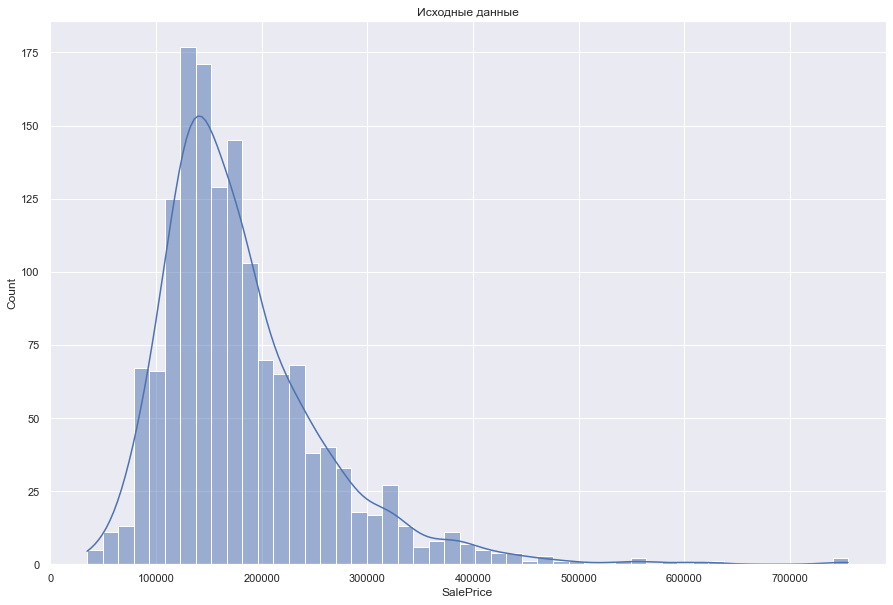

In [54]:
plt.figure(figsize=(15, 10))
sns.histplot(x=np.expm1(train_data.SalePrice), kde=True)
plt.title('Исходные данные')
plt.show()

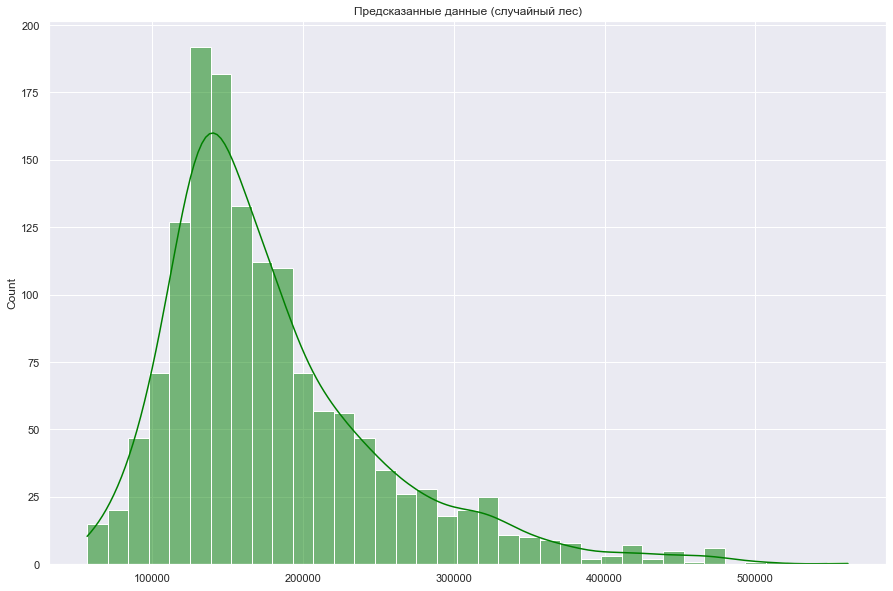

In [55]:
plt.figure(figsize=(15, 10))
sns.histplot(x=np.expm1(pred_rf), kde=True, color='green')
plt.title('Предсказанные данные (случайный лес)')
plt.show()

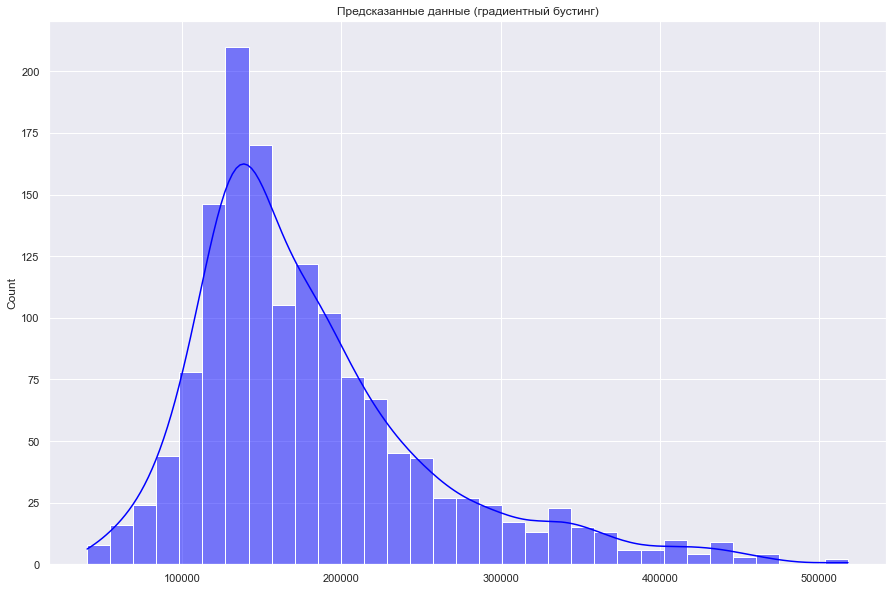

In [56]:
plt.figure(figsize=(15, 10))
sns.histplot(x=np.expm1(pred_gbr), kde=True, color='blue')
plt.title('Предсказанные данные (градиентный бустинг)')
plt.show()

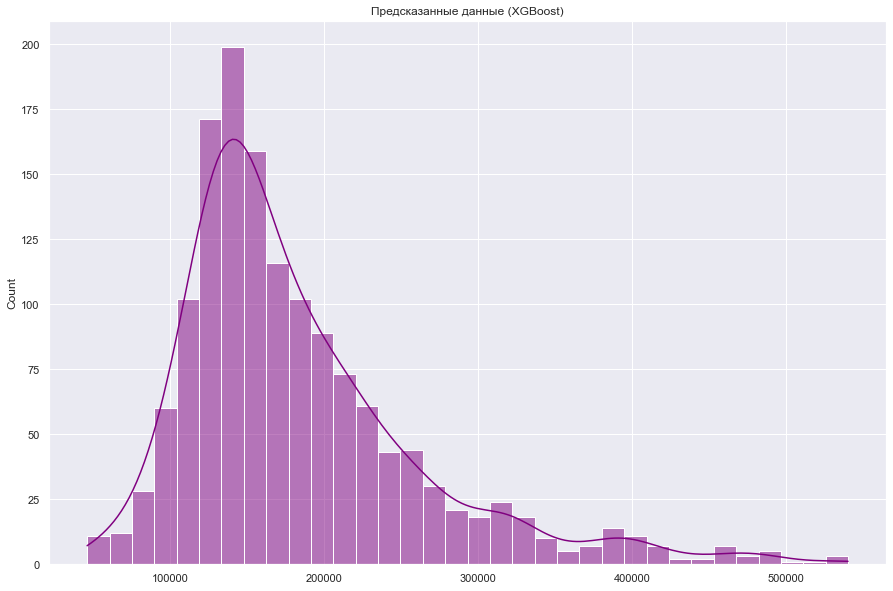

In [57]:
plt.figure(figsize=(15, 10))
sns.histplot(x=np.expm1(pred_xgbr), kde=True, color='purple')
plt.title('Предсказанные данные (XGBoost)')
plt.show()

# Сериализация

## [Pickle](https://docs.python.org/3/library/pickle.html)

In [58]:
import pickle

In [59]:
model_rf = pickle.dumps(clf_rf)
print(type(model_rf), type(clf_rf))

with open('../models/model_rf.pkl', 'wb') as output:
  pickle.dump(clf_rf, output)

<class 'bytes'> <class 'sklearn.ensemble._forest.RandomForestRegressor'>


In [60]:
model_gbr = pickle.dumps(clf_gbr)
print(type(model_gbr), type(clf_gbr))

with open('../models/model_gbr.pkl', 'wb') as output:
  pickle.dump(clf_gbr, output)

<class 'bytes'> <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>


In [61]:
model_xgbr = pickle.dumps(clf_xgbr)
print(type(model_xgbr), type(clf_xgbr))

with open('../models/model_xgbr.pkl', 'wb') as output:
  pickle.dump(clf_xgbr, output)

<class 'bytes'> <class 'xgboost.sklearn.XGBRegressor'>


In [62]:
test_gbr = pickle.loads(model_gbr)
print(type(test_gbr) == type(clf_gbr))

True


In [63]:
all(clf_gbr.predict(X_test) == test_gbr.predict(X_test))

True

In [72]:
train_data.to_csv('../data/train-pp.csv', index=False)
test_data.to_csv('../data/test-pp.csv', index=False)

In [75]:
test = pd.read_csv('../data/test-pp.csv')
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-0.6,2,0.590909,0.538713,1,3,3,0,4,0,...,0.0,0.0,120.0,0.0,0.0,0.00,1.0,8,4,12.039298
1,-0.6,3,0.636364,1.179692,1,0,3,0,0,0,...,0.0,0.0,0.0,0.0,12500.0,0.00,1.0,8,4,12.142917
2,0.2,3,0.318182,1.073791,1,0,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,-0.75,1.0,8,4,12.120431
3,0.2,3,0.500000,0.140313,1,0,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,0.00,1.0,8,4,12.096919
4,1.4,3,-1.090909,-1.064825,1,0,1,0,4,0,...,0.0,0.0,144.0,0.0,0.0,-1.25,1.0,8,4,11.923253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.2,4,-2.090909,-1.808554,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,0.00,-1.0,8,4,12.026241
1455,2.2,4,-2.090909,-1.818733,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,-0.50,-1.0,8,0,12.012426
1456,-0.6,3,4.227273,2.569005,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,0.75,-1.0,8,0,12.297847
1457,0.7,3,-0.227273,0.252514,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,700.0,0.25,-1.0,8,4,12.127707
